In [2]:
import multiVQA.plots as vq
import multiVQA.ansatz as az

[Qibo 0.1.7|INFO|2022-04-05 11:38:02]: Using qibotf backend on /device:CPU:0


In [2]:
az.var_form(4, 6, 'article').draw()

'q0: ─U3─o───RY───RY─o───RY───RY─o───RY───RY─\nq1: ─U3─Z───RY─o─RY─Z───RY─o─RY─Z───RY─o─RY─\nq2: ─U3───o─RY─Z─RY───o─RY─Z─RY───o─RY─Z─RY─\nq3: ─U3───Z─RY───RY───Z─RY───RY───Z─RY───RY─'

In [2]:
rows = {'kind': 'TEXT', 'instance': 'TEXT', 'trial': 'INT', 'layer_number': 'INT', 'nodes_number': 'INT',
        'optimization': 'TEXT', 'compression': 'FLOAT', 'pauli_string_length': 'INT', 'entanglement': 'TEXT',
        'graph_kind': 'TEXT', 'activation_function': 'TEXT', 'qubits': 'INT', 'solution': 'TEXT',
        'unrounded_solution': 'TEXT', 'max_energy': 'FLOAT', 'min_energy': 'FLOAT', 'energy_ratio': 'FLOAT',
        'initial_parameters': 'TEXT', 'parameters': 'TEXT', 'number_parameters': 'INT', 'epochs': 'INT',
        'time': 'FLOAT'}

In [3]:
x=('layer_number',[5,10, 15, 20, 25])
y='max_energy'
flags= ('nodes_number',[45])
fixed = {'entanglement': 'Diego','optimization': 'L-BFGS-B', 'graph_kind': 'indexed'}
compares = ('kind',["multibaseVQA","goemans_williamson" ])

Averages y: [0.95204529 0.95269455 0.95217365 0.95227245 0.95192284] Errors y: [0.00395029 0.00409091 0.00413043 0.00412026 0.00414909]


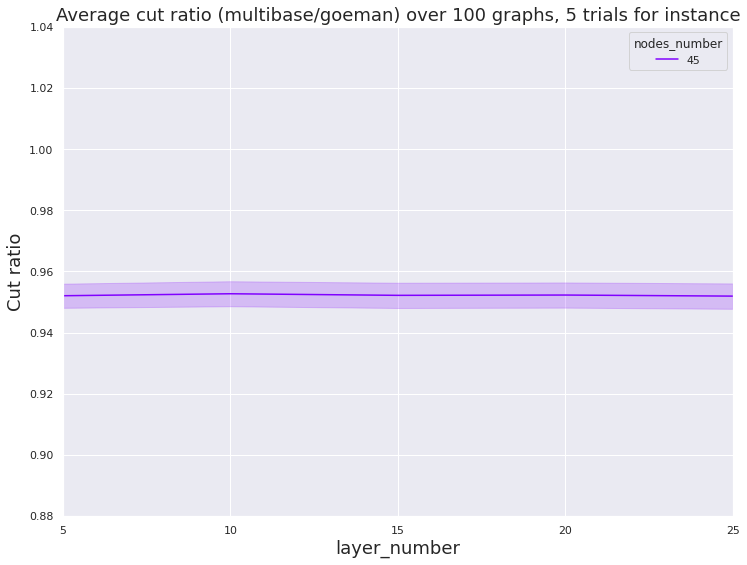

In [4]:
vq.plotter_compare(x, y, flags, fixed, compares, pick_method= 'average', instances=None, save_fig='generic_entanglement_SLSQP', ylim=(0.88, 1.04))

In [9]:
fixed = {'layer_number': '5','nodes_number': '45'}

In [10]:
vq.plot_histogram(fixed,'X', 'MaxCutDatabase')

[('[-0.09650341092674661, -0.47955076629118465, -0.09940426946129872, 0.36069776028331313, -0.3359139558392264, 0.1660452452633685, 0.042426360541404716, -0.07460381082301445, 0.15479371639240722, 0.27870225451637226, -0.20823083520634028, 0.2958802021459804, -0.290313542903773, 0.29956534070462815, -0.2405554447700865, 0.9510673904701372, 0.657917831946842, 0.713763478956949, 0.5766675483751131, -0.8527770586697241, 0.6835215839746888, 0.7231110192883732, 0.584128550373368, -0.8610355524426034, 0.6394133750810841, 0.46462663806020876, -0.6554350265784421, 0.6005294432861155, -0.7423379727099751, -0.5845251437890383, -0.14824812589185846, 0.44755592783285647, -0.48485595621038075, -0.641922365604366, -0.0028660548531510843, -0.18310770075727523, 0.08341351061103176, 0.11381697791123699, 0.11023179764133316, -0.40422200545204934, -0.2913789300402134, 0.08316868811672432, 0.4961395025666972, 0.19884410753237944, -0.06350102463473131]',), ('[0.3321175276765605, -0.28841855501676084, 0.055